# Eigen Face

Here, we will look into ability of PCA to perform dimensionality reduction on a set of Labeled Faces in the Wild dataset made available from scikit-learn. Our images will be of shape (62, 47). 

#### Imports

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from sklearn.datasets import fetch_lfw_people
from time import time
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

#### Setup data

In [85]:
faces = fetch_lfw_people(min_faces_per_person=8)
X = faces.data
y = faces.target_names
name_index = faces.target

print(faces.target_names)
print(faces.images.shape)
print(faces.keys())
print(faces.data.shape) 

['Abdullah Gul' 'Adrien Brody' 'Al Gore' 'Alejandro Toledo' 'Ali Naimi'
 'Alvaro Uribe' 'Amelie Mauresmo' 'Ana Palacio' 'Andre Agassi'
 'Andy Roddick' 'Angelina Jolie' 'Ann Veneman' 'Anna Kournikova'
 'Antonio Palocci' 'Ari Fleischer' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Bill Frist' 'Bill Gates'
 'Bill Graham' 'Bill McBride' 'Bill Simon' 'Bob Hope' 'Britney Spears'
 'Carlos Menem' 'Carlos Moya' 'Catherine Zeta-Jones' 'Celine Dion'
 'Cesar Gaviria' 'Charles Moose' 'Charles Taylor' 'Colin Farrell'
 'Colin Powell' 'Condoleezza Rice' 'David Beckham' 'David Nalbandian'
 'Dick Cheney' 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fernando Gonzalez' 'Fernando Henrique Cardoso'
 'Fidel Castro' 'George Clooney' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gerry Adams'
 'Gloria Macapagal Arroyo' 'Gonzalo Sanchez de Lozada' 'Gordon Brown'
 'Gray Davis' 'Guillermo Coria' 'Halle Berry' 'Hamid Kar

Since our images is of the shape (62, 47), we unroll each image into a single row vector of shape (1, 2914). This means that we have 2914 features defining each image. These 2914 features will result into 2914 principal components in the PCA projection space. Therefore, each image location contributes more or less to each principal component.

#### Implement Eigen Faces

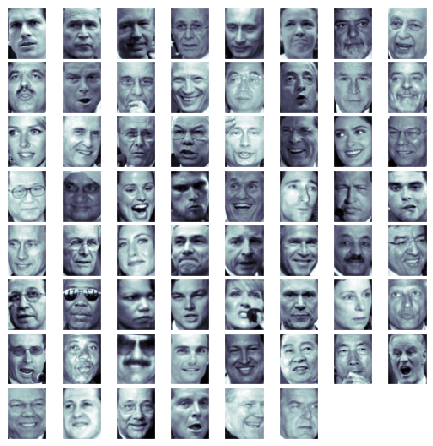

In [33]:
#Vizualizing the dataset

#Setup a figure 6 inches by 6 inches 
fig = plt.figure(figsize=(6,6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 
for i in range(62): 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest') 
plt.show() 

In [37]:
#Implementing PCA Function

def pca_transform(X, n_components):

    X_mean = np.mean(X, axis=0)
    X_mean = X_mean.reshape(1, -1)
#     print("This is mean", X_mean.shape, X_mean)
    X -= X_mean
#     print("This is new X", X_input.shape)
    N = (X.shape)[0]
    constant = 1/(N - 1)

    # Calculating covariance matrix 
    cov_matrix = constant * np.dot(X.T, X)
    cov_matrix = np.array(cov_matrix, dtype=float)

    # Calculating eigen values and eigen vectors (or first n-principal components)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Step 4
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx][:n_components]
#     print("Shape of eigenvalues", eigenvalues.shape)
    eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
#     print("Shape of EigVec", eigenvectors.shape)
    
    X_projected = np.dot(X, eigenvectors)
#     print("This is X projected and its shape",X_projected.shape, X_projected)
    eigenvectors = eigenvectors.T
#     print("EigVec shape", eigvecs.shape)
    return X_projected, eigenvectors, eigenvalues



In [38]:
#Performing PCA on all features
max_components = np.shape(X)[1]
X_projected, principal_components, variances = pca_transform(X,max_components)

print(X_projected.shape, principal_components.shape) 

(4822, 2914) (2914, 2914)


In [39]:
#Finding number of principal components such that 95% variance is preserved

total = np.sum(variances)
variance_ratio = variances/total_var

v = np.cumsum(variance_ratio)
ind = []
for i in range(len(v)):
    if v[i] <= 0.95:
        ind.append(i)

required_principal_components = []
for i in ind:
    required_principal_components.append(principal_components[i])

print(len(required_principal_components))

177


In [40]:
n_components = 100

Extracting the top 100 eigenfaces from 4822 faces


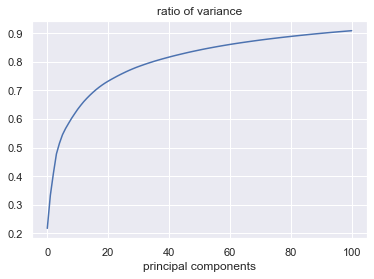

In [59]:
#Extraction of top 100 eigenfaces
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X.shape[0]))

X_projected_new, principal_components_new, variances_new = pca_transform(X,n_components)

f,ax = plt.subplots()
plt.plot(v[:101])
plt.title("ratio of variance")
ax.set_xlabel("principal components")
plt.show()

# print(X_projected_new.shape, principal_components_new.shape) 

In [89]:
#Implementing the plotting faces function

def plot_faces(images,labels, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.2 * n_row))
    plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((62,47)), cmap=plt.cm.gray)
        plt.title(y[labels[i]])
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()

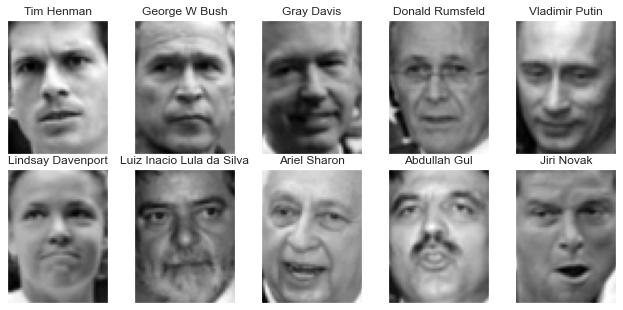

In [90]:
#Visualising the first 10 eigenfaces
plot_faces(X[:10],name_index[:10])
# plot_faces()

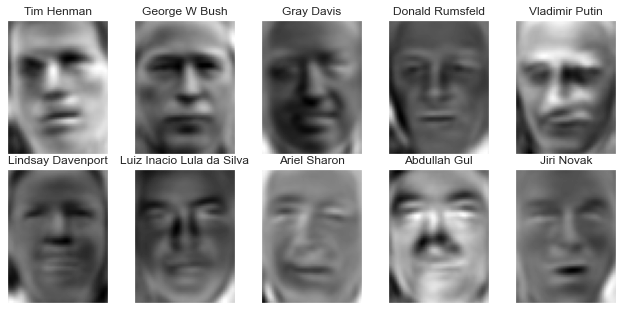

In [91]:
#Reconstructing the first 10 images given above (look here)
X_new = np.dot(X_projected_new[:, :n_components], principal_components_new[:n_components, :])


#Visualising the reconstructed faces
plot_faces(X_new[:10], name_index[:10])


# Adding noise to images

We now add gaussian noise to the images

In [45]:
def plot_noisy_faces(noisy_faces):
    fig, axes = plt.subplots(2, 10, figsize=(10, 2.5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
      ax.imshow(noisy_faces[i].reshape(62, 47), cmap='binary_r')

(4822, 2914)


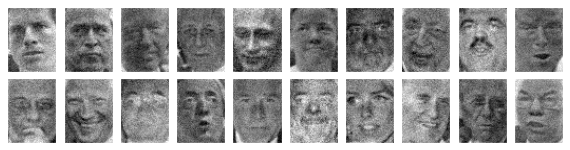

In [46]:
np.random.seed(42)
noisy_faces = np.random.normal(X, 15)
plot_noisy_faces(noisy_faces)
print(noisy_faces.shape)

In [53]:
#Performing PCA
max_components_noise = np.shape(noisy_faces)[1]
X_projected_noise, principal_components_noise, variances_noise = pca_transform(noisy_faces,max_components_noise)

print(X_projected_noise.shape,principal_components_noise.shape) 

(4822, 2914) (2914, 2914)


In [56]:
#Finding number of principal components such that 95% variance is preserved

total_noise = np.sum(variances_noise)
variance_ratio_noise = variances_noise/total_var_noise


v_noise = np.cumsum(variance_ratio_noise)
ind_noise = []
for i in range(len(v_noise)):
    if v_noise[i] <= 0.95:
        ind_noise.append(i)

required_principal_components_noise = []
for i in ind_noise:
    required_principal_components_noise.append(principal_components_noise[i])

print(len(required_principal_components_noise))

1013


Extracting the top 100 eigenfaces from 4822 faces


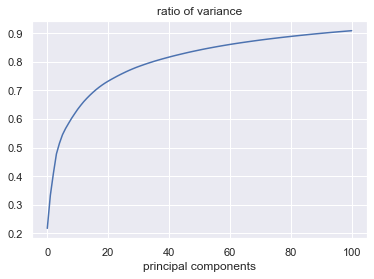

In [62]:
#Extraction of top 100 eigenfaces
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, noisy_faces.shape[0]))

X_projected_new_noise, principal_components_new_noise, variances_new_noise = pca_transform(noisy_faces,n_components)

f,ax = plt.subplots()
plt.plot(v[:101])
plt.title("ratio of variance")
ax.set_xlabel("principal components")
plt.show()

# print(X_projected_new_noise.shape, principal_components_new_noise.shape) 

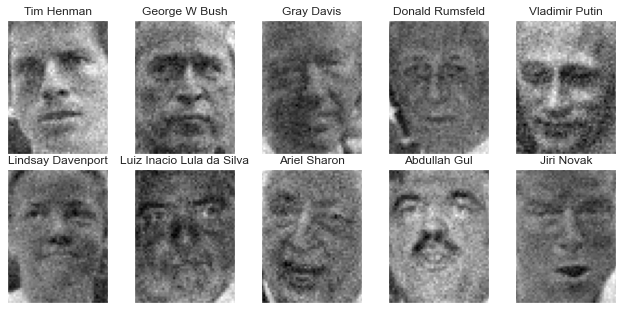

In [92]:
#Visualising the first 10 eigenfaces
plot_faces(noisy_faces[:10],name_index[:10])

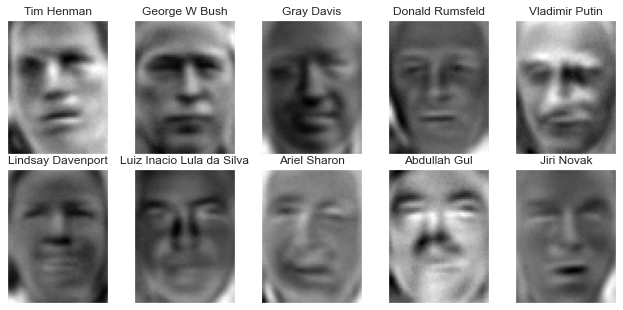

In [93]:
#Reconstructing the first 10 images given above (look here)
X_new_noise = np.dot(X_projected_noise[:, :n_components], principal_components_noise[:n_components, :])

#Visualising the reconstructed faces
plot_faces(X_new_noise[:10],name_index[:10])


### The number of principal components required to preserve 95% of variance for:
###  1. Original data = 177
###  2. Noisy data = 1013